In [2]:
from lib.utils import get_train_split_data, load_all_resale_data, get_cleaned_normalized_data
from lib.eval import get_regression_metrics

from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Configuration
RANDOM_STATE = 42
TEST_SIZE = 0.2
HIDDEN_LAYER_SIZES = (64, 32)
MAX_ITER = 200

In [4]:
X, y = load_all_resale_data()

X, y = get_cleaned_normalized_data(X, y)

# Split data
print(f"Splitting data with test size {TEST_SIZE}...")
X_train, X_test, y_train, y_test = get_train_split_data(X, y, TEST_SIZE)

Loading data from c:\users\wzaww\projects\nus-cs3244-assignment1\scripts\lib\../data\Resale Flat Prices (Based on Approval Date), 1990 - 1999.csv...
Loading data from c:\users\wzaww\projects\nus-cs3244-assignment1\scripts\lib\../data\Resale Flat Prices (Based on Approval Date), 2000 - Feb 2012.csv...
Loading data from c:\users\wzaww\projects\nus-cs3244-assignment1\scripts\lib\../data\Resale Flat Prices (Based on Registration Date), From Mar 2012 to Dec 2014.csv...
Loading data from c:\users\wzaww\projects\nus-cs3244-assignment1\scripts\lib\../data\Resale Flat Prices (Based on Registration Date), From Jan 2015 to Dec 2016.csv...
Loading data from c:\users\wzaww\projects\nus-cs3244-assignment1\scripts\lib\../data\Resale flat prices based on registration date from Jan-2017 onwards.csv...
Combined dataset shape: (948962, 11)
Features shape: (948962, 10)
Target shape: (948962,)
Selected features: month, town, flat_type, block, street_name, storey_range, floor_area_sqm, flat_model, lease_com

In [5]:
# Initialize model
print("Initializing MLPRegressor...")
model = MLPRegressor(
    hidden_layer_sizes=HIDDEN_LAYER_SIZES,
    max_iter=MAX_ITER,
    random_state=RANDOM_STATE,
    early_stopping=True,
    validation_fraction=0.1,
    verbose=True
)

Initializing MLPRegressor...


In [6]:
# Train model
print("Training neural network...")
model.fit(X_train, y_train)

Training neural network...
Iteration 1, loss = 68811596356.47735596
Validation score: -3.177422
Iteration 2, loss = 57999504753.30496979
Validation score: -2.000902
Iteration 3, loss = 35051591339.77300262
Validation score: -0.501851
Iteration 4, loss = 16837560599.49104881
Validation score: 0.203891
Iteration 5, loss = 11095672209.84170151
Validation score: 0.345626
Iteration 6, loss = 9735570049.30395699
Validation score: 0.407986
Iteration 7, loss = 8857311788.41398811
Validation score: 0.459006
Iteration 8, loss = 8111285151.87802505
Validation score: 0.503431
Iteration 9, loss = 7459172859.15771770
Validation score: 0.542479
Iteration 10, loss = 6887129365.87797737
Validation score: 0.576817
Iteration 11, loss = 6385245752.40049553
Validation score: 0.607082
Iteration 12, loss = 5942585143.03721523
Validation score: 0.633924
Iteration 13, loss = 5545257199.73491573
Validation score: 0.658302
Iteration 14, loss = 5179800833.37204647
Validation score: 0.680958
Iteration 15, loss = 4

MLPRegressor(early_stopping=True, hidden_layer_sizes=(64, 32), random_state=42,
             verbose=True)

In [7]:
# Make predictions
print("Making predictions...")
train_preds = model.predict(X_train)
test_preds = model.predict(X_test)

Making predictions...


In [8]:
# Evaluate
print("\nTraining Performance:")
print(f"- MSE: {mean_squared_error(y_train, train_preds):.4f}")
print(f"- MAE: {mean_absolute_error(y_train, train_preds):.4f}")
print(f"- R²: {r2_score(y_train, train_preds):.4f}")

print("\nTest Performance:")
print(f"- MSE: {mean_squared_error(y_test, test_preds):.4f}")
print(f"- MAE: {mean_absolute_error(y_test, test_preds):.4f}")
print(f"- R²: {r2_score(y_test, test_preds):.4f}")


Training Performance:
- MSE: 2914912071.2675
- MAE: 41117.8986
- R²: 0.9077

Test Performance:
- MSE: 3099776587.9501
- MAE: 42388.3097
- R²: 0.9011


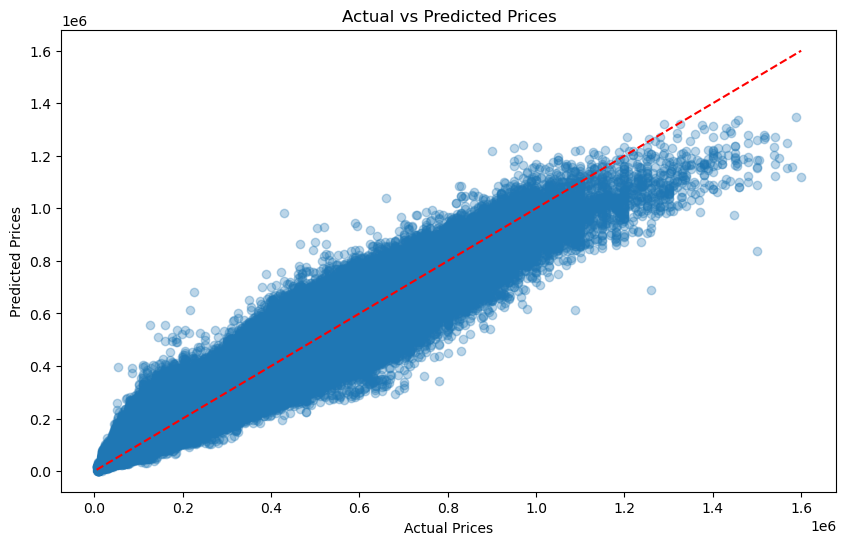

In [9]:
# Plot results
plt.figure(figsize=(10, 6))
plt.scatter(y_test, test_preds, alpha=0.3)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices")
plt.show()